In [1]:
!pip install sklearn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [2]:
def plot_confusion_matrix(y,y_predict,title):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f"Confusion Matrix: {title}"); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])


In [3]:
#----Loading dataset----------------
spacex_csv_file = "D://PERSONAL//DataEngine//IBM_DS//10_Capstone//dataset_part_2.csv"
data = pd.read_csv(spacex_csv_file)
Y = data['Class'].to_numpy()
spacex_csv_file = "D://PERSONAL//DataEngine//IBM_DS//10_Capstone//dataset_part_3.csv"
X = pd.read_csv(spacex_csv_file)

#----Prepocessing----------------
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [4]:
#----Models----------------
param_grid = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, param_grid, cv=10)
grid.fit(X_train,Y_train)
model = grid.best_estimator_
yhat_tree = model.fit(X_train,Y_train).predict(X_test)
tree_score = accuracy_score(Y_test, yhat_tree, normalize=True)
print("tree grid.best_pamas:", grid.best_params_)
print("tree grid.best_estimator:", grid.best_estimator_)
print("tree score:", tree_score)


tree grid.best_pamas: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                       min_samples_leaf=4, min_samples_split=5,
                       splitter='random')
tree score: 0.8888888888888888


lr grid.best_pamas: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
lr grid.best_estimator: LogisticRegression(C=0.01)
lr score: 0.8333333333333334
svm grid.best_pamas: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
svm grid.best_estimator: SVC(gamma=0.03162277660168379, kernel='sigmoid')
svm score: 0.8333333333333334
knn grid.best_pamas: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
knn grid.best_estimator: KNeighborsClassifier(n_neighbors=10, p=1)
knn score: 0.8333333333333334


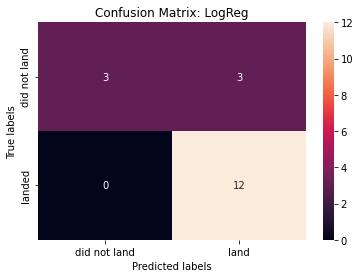

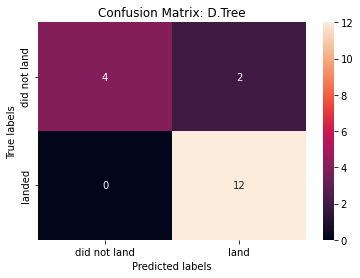

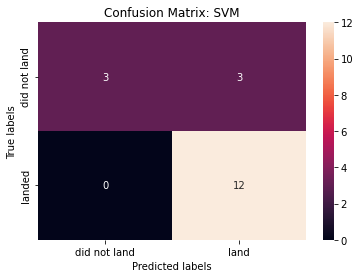

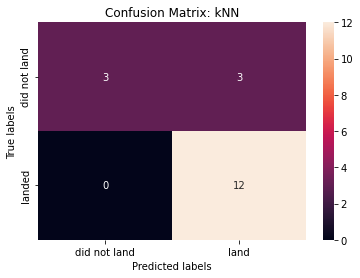

In [24]:
param_grid ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
#solvers: ‘newton-cg:15/0.846429’, ‘lbfgs’, ‘liblinear:0.7778’, ‘sag:15/0.846429’, ‘saga:15/0.846429’ 
clf = LogisticRegression()
grid = GridSearchCV(clf, param_grid, cv=10)
grid.fit(X_train,Y_train)
model = grid.best_estimator_
yhat_lr = model.fit(X_train,Y_train).predict(X_test)
lr_score = accuracy_score(Y_test, yhat_lr, normalize=True)
print("lr grid.best_pamas:", grid.best_params_)
print("lr grid.best_estimator:", grid.best_estimator_)
print("lr score:", lr_score)


param_grid = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
clf = SVC()
grid = GridSearchCV(clf, param_grid, cv=10)
grid.fit(X_train,Y_train)
model = grid.best_estimator_
yhat_svm = model.fit(X_train,Y_train).predict(X_test)
svm_score = accuracy_score(Y_test, yhat_svm, normalize=True)
print("svm grid.best_pamas:", grid.best_params_)
print("svm grid.best_estimator:", grid.best_estimator_)
print("svm score:", svm_score)

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, param_grid, cv=10)
grid.fit(X_train,Y_train)
model = grid.best_estimator_
yhat_knn = model.fit(X_train,Y_train).predict(X_test)
knn_score = accuracy_score(Y_test, yhat_knn, normalize=True)
print("knn grid.best_pamas:", grid.best_params_)
print("knn grid.best_estimator:", grid.best_estimator_)
print("knn score:", knn_score)


plt.figure()
plot_confusion_matrix(Y_test,yhat_lr,"LogReg")
plt.figure()
plot_confusion_matrix(Y_test,yhat_tree,"D.Tree")
plt.figure()
plot_confusion_matrix(Y_test,yhat_svm,"SVM")
plt.figure()
plot_confusion_matrix(Y_test,yhat_knn,"kNN")



In [6]:
print("**********")
print("D.Tree Accuracy: ", metrics.accuracy_score(Y_test, yhat_tree))
print("D.Tree Jaccard score: %.4f" % jaccard_score(Y_test, yhat_tree, pos_label=1))
print("D.Tree Avg F1-score: %.4f" % f1_score(Y_test, yhat_tree, average='weighted'))
print(classification_report(Y_test, yhat_tree))

print("**********")
print("L.R Accuracy: ", metrics.accuracy_score(Y_test, yhat_lr))
print("L.R Jaccard score: %.4f" % jaccard_score(Y_test, yhat_lr, pos_label=1))
print("L.R Avg F1-score: %.4f" % f1_score(Y_test, yhat_lr, average='weighted'))
# print("Log loss: %.4f" % log_loss(y_testset, yhat_prob))
print(classification_report(Y_test, yhat_lr))

print("**********")
print("SVM Accuracy: ", metrics.accuracy_score(Y_test, yhat_svm))
print("SVM Jaccard score: %.4f" % jaccard_score(Y_test, yhat_svm, pos_label=1))
print("SVM Avg F1-score: %.4f" % f1_score(Y_test, yhat_svm, average='weighted'))
print(classification_report(Y_test, yhat_svm))

print("**********")
print("KNN Accuracy: ", metrics.accuracy_score(Y_test, yhat_knn))
print("KNN Jaccard score: %.4f" % jaccard_score(Y_test, yhat_knn, pos_label=1))
print("KNN Avg F1-score: %.4f" % f1_score(Y_test, yhat_knn, average='weighted'))
print(classification_report(Y_test, yhat_knn))

**********
D.Tree Accuracy:  0.8888888888888888
D.Tree Jaccard score: 0.8571
D.Tree Avg F1-score: 0.8821
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.86      1.00      0.92        12

    accuracy                           0.89        18
   macro avg       0.93      0.83      0.86        18
weighted avg       0.90      0.89      0.88        18

**********
L.R Accuracy:  0.8333333333333334
L.R Jaccard score: 0.8000
L.R Avg F1-score: 0.8148
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

**********
SVM Accuracy:  0.8333333333333334
SVM Jaccard score: 0.8000
SVM Avg F1-score: 0.8148
              precision    recall  f1-score   sup

In [28]:
plt_result0 = pd.DataFrame([['Logreg',0.8333,0.8000,0.8148],
                           ['SVM',    0.8333,0.8000,0.8148],
                           ['D.Tree', 0.8889,0.8571,0.8821],
                           ['kNN',    0.8333,0.8000,0.8148]],
                           index=[1,2,3,4],
                           columns=['Methods','Accuracy','J.Score','A.F1 Score'])
plt_result0

,Methods,Accuracy,J.Score,A.F1 Score
1,Logreg,0.8333,0.8000,0.8148
2,SVM,0.8333,0.8000,0.8148
3,D.Tree,0.8889,0.8571,0.8821
4,kNN,0.8333,0.8000,0.8148


In [27]:
plt_result1 = pd.DataFrame([['Logreg',0.8333,0.8000,0.8148],
                           ['SVM',    0.8333,0.8000,0.8148],
                           ['D.Tree', 0.8333,0.8000,0.8148],
                           ['kNN',    0.8333,0.8000,0.8148]],
                           index=[1,2,3,4],
                           columns=['Methods','Accuracy','J.Score','A.F1 Score'])
plt_result1

,Methods,Accuracy,J.Score,A.F1 Score
1,Logreg,0.8333,0.8,0.8148
2,SVM,0.8333,0.8,0.8148
3,D.Tree,0.8333,0.8,0.8148
4,kNN,0.8333,0.8,0.8148


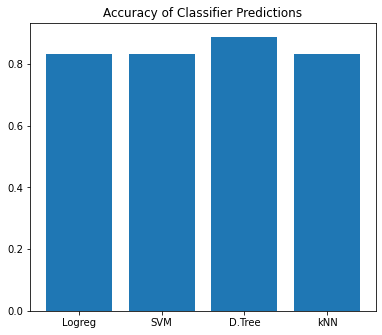

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,1])
ys = plt_result0["Accuracy"]
xs = plt_result0["Methods"]
ax.set_title('Accuracy of Classifier Predictions')
ax.bar(xs,ys)
plt.show()

# ys = plt_result1["Accuracy"]
# xs = plt_result1["Methods"]
# ax.set_title('Accuracy of Classifier Predictions')
# ax.bar(xs,ys)
# plt.show()

In [ ]:
The latest performance by D.Tree
executed in 7.71s, finished 18:40:55 2022-08-30
tree grid.best_pamas: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                       min_samples_leaf=4, min_samples_split=5,
                       splitter='random')
tree score: 0.8888888888888888executed in 7.71s, finished 18:40:55 2022-08-30
tree grid.best_pamas: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                       min_samples_leaf=4, min_samples_split=5,
                       splitter='random')
tree score: 0.8888888888888888

In [ ]:
Summary of D.Tree's performance
Note: Score_0.8333 is the mode of total results and not listed fully

tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features='sqrt', min_samples_split=10)
tree score: 0.8333333333333334

tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='sqrt', splitter='random')
tree score: 0.6666666666666666

tree grid.best_estimator: DecisionTreeClassifier(max_depth=6, max_features='auto')
tree score: 0.7222222222222222

tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='sqrt', splitter='random')
tree score: 0.6666666666666666

tree grid.best_estimator: DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=2, splitter='random')
tree score: 0.8888888888888888
    
tree grid.best_estimator: DecisionTreeClassifier(max_depth=4, max_features='auto', splitter='random')
tree score: 0.8333333333333334  
    
tree grid.best_estimator: DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_split=5, splitter='random')
tree score: 0.8333333333333334

tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto', min_samples_leaf=4)
tree score: 0.8333333333333334    
    
tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto', min_samples_leaf=4)
tree score: 0.8333333333333334
    
tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt', min_samples_split=5, splitter='random')
tree score: 0.6666666666666666    
    
tree grid.best_estimator: DecisionTreeClassifier(max_depth=14, max_features='auto', splitter='random')
tree score: 0.7222222222222222    

tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='auto', min_samples_leaf=4, min_samples_split=5)
tree score: 0.8333333333333334    
    
tree grid.best_estimator: DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_split=10, splitter='random')
tree score: 0.9444444444444444    
    
tree grid.best_estimator: DecisionTreeClassifier(max_depth=10, max_features='auto')
tree score: 0.7222222222222222    
    
tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto', min_samples_split=5, splitter='random')
tree score: 0.8333333333333334    
    
tree grid.best_estimator: DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=2, min_samples_split=10, splitter='random')
tree score: 0.8333333333333334    
    

In [ ]:
1
executed in 7.58s, finished 09:33:57 2022-08-30
tree grid.best_pamas: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features='sqrt',
                       min_samples_split=10)
tree score: 0.8333333333333334

In [ ]:
2
executed in 7.80s, finished 09:50:18 2022-08-30
tree grid.best_pamas: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       splitter='random')
tree score: 0.6666666666666666

In [ ]:
3
executed in 7.84s, finished 09:51:21 2022-08-30
tree grid.best_pamas: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
tree grid.best_estimator: DecisionTreeClassifier(max_depth=6, max_features='auto')
tree score: 0.7222222222222222

In [ ]:
4
executed in 7.56s, finished 09:52:11 2022-08-30
tree grid.best_pamas: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto')
tree score: 0.8333333333333334

In [ ]:
5
executed in 7.68s, finished 09:53:04 2022-08-30
tree grid.best_pamas: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
tree grid.best_estimator: DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=2,
                       splitter='random')
tree score: 0.8888888888888888

In [ ]:
6
executed in 7.76s, finished 09:53:42 2022-08-30
tree grid.best_pamas: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
tree grid.best_estimator: DecisionTreeClassifier(max_depth=4, max_features='auto', splitter='random')
tree score: 0.8333333333333334

In [ ]:
7
executed in 7.59s, finished 09:54:29 2022-08-30
tree grid.best_pamas: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
tree grid.best_estimator: DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_split=5,
                       splitter='random')
tree score: 0.8333333333333334

In [ ]:
8
executed in 7.50s, finished 09:55:22 2022-08-30
tree grid.best_pamas: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       min_samples_leaf=4)
tree score: 0.8333333333333334

In [ ]:
9
executed in 7.50s, finished 09:55:22 2022-08-30
tree grid.best_pamas: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       min_samples_leaf=4)
tree score: 0.8333333333333334

In [ ]:
10
executed in 7.78s, finished 09:59:14 2022-08-30
tree grid.best_pamas: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_split=5, splitter='random')
tree score: 0.6666666666666666

In [ ]:
11
executed in 7.67s, finished 09:59:55 2022-08-30
tree grid.best_pamas: {'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
tree grid.best_estimator: DecisionTreeClassifier(max_depth=14, max_features='auto', splitter='random')
tree score: 0.7222222222222222

In [ ]:
12
executed in 7.49s, finished 10:00:36 2022-08-30
tree grid.best_pamas: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='auto',
                       min_samples_leaf=4, min_samples_split=5)
tree score: 0.8333333333333334

In [ ]:
13
executed in 7.81s, finished 10:01:08 2022-08-30
tree grid.best_pamas: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
tree grid.best_estimator: DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_split=10,
                       splitter='random')
tree score: 0.9444444444444444

In [ ]:
14
executed in 7.68s, finished 10:01:35 2022-08-30
tree grid.best_pamas: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
tree grid.best_estimator: DecisionTreeClassifier(max_depth=10, max_features='auto')
tree score: 0.7222222222222222

In [ ]:
15
executed in 7.79s, finished 10:01:49 2022-08-30
tree grid.best_pamas: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
tree grid.best_estimator: DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                       min_samples_split=5, splitter='random')
tree score: 0.8333333333333334

In [ ]:
16
executed in 8.01s, finished 10:02:13 2022-08-30
tree grid.best_pamas: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
tree grid.best_estimator: DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=2,
                       min_samples_split=10, splitter='random')
tree score: 0.8333333333333334